In [515]:
%load_ext autoreload
%autoreload 2

import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.physical_models import BlackBody


environments = [NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43),
                NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.190, line_velocity= 0.190, t_d=3.41)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[<NLTE.NLTE_model.CollisionProcess object at 0x7fc1051e6770>, <NLTE.NLTE_model.RadiativeProcess object at 0x7fc1051e5090>, <NLTE.NLTE_model.RecombinationProcess object at 0x7fc104dce2f0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7fc104dcee60>]
[<NLTE.NLTE_model.CollisionProcess object at 0x7fc105e552a0>, <NLTE.NLTE_model.RadiativeProcess object at 0x7fc105e54520>, <NLTE.NLTE_model.RecombinationProcess object at 0x7fc1047eea70>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7fc1047ede40>]


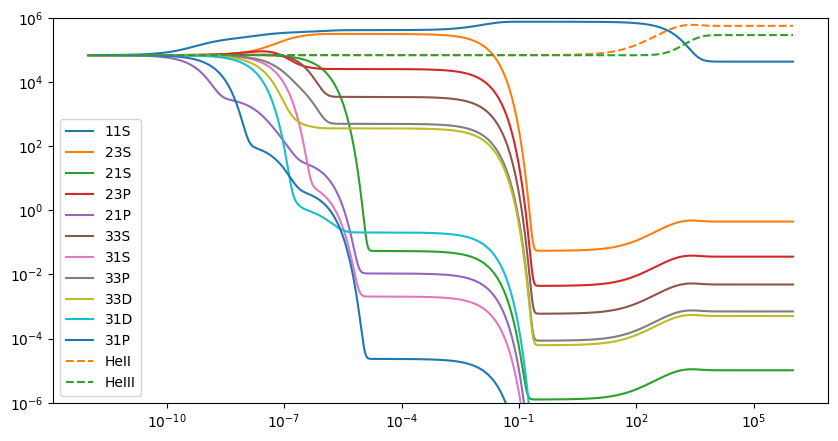

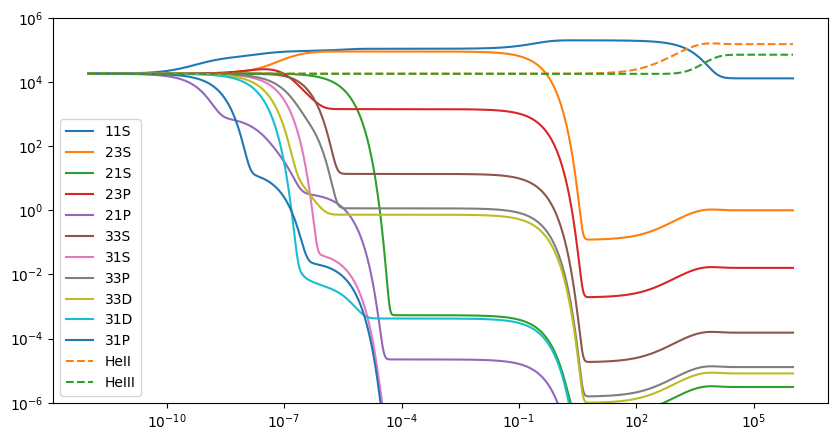

In [516]:
states = NLTE.NLTE_model.States()
for environment in environments:
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    print(nlte_solver.processes)
    t, y = nlte_solver.solve(np.geomspace(1e-12,1000000, 1000))
    plt.figure(figsize=(10,5))
    plt.plot(t, y.T[:, :-2], label = states.names);
    plt.plot(t, y.T[:, -2:], linestyle="--", label  = ["HeII", "HeIII"]);
    plt.yscale("log")
    plt.xscale("log")
    plt.ylim(1e-6, 1e6)
    plt.legend()
    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)

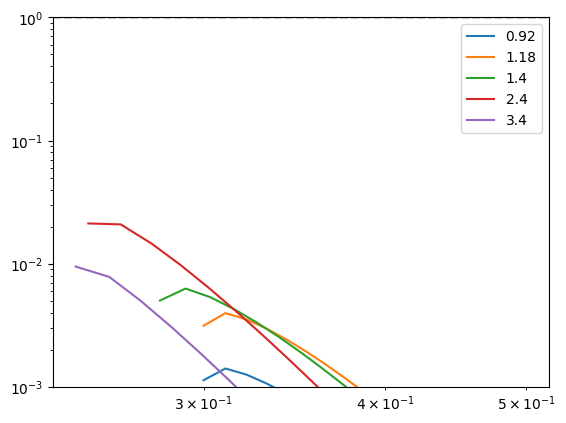

In [517]:

parameters = [{"T_phot": 5400, "photosphere_velocity": 0.3, "t_d": 0.92},
              {"T_phot": 4400, "photosphere_velocity": 0.3, "t_d": 1.18},
              {"T_phot": 4200, "photosphere_velocity": 0.28, "t_d": 1.4},
              {"T_phot": 3300, "photosphere_velocity": 0.25, "t_d": 2.4},
              {"T_phot": 3000, "photosphere_velocity": 0.245, "t_d": 3.4},
              ]# TODO: rest
density_table = []
for params in parameters:
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 20)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    plt.plot(velocities, densities[:,1]/(7.4*params["t_d"]**-1), label = params["t_d"]);
    plt.yscale("log")
    plt.axhline(1, linestyle="--", color="black")
    plt.xscale("log")
    plt.ylim(1e-3, 1e0)
    plt.legend()
    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)

In [518]:
import pickle
density_table = np.array(density_table)
pickle.dump({"densities":density_table, "parameters" : parameters, "states" : nlte_solver.states}, open("densities.pkl", "wb"))


In [519]:

# demonstrate how to open the pickle file
import pickle
data = pickle.load(open("densities.pkl", "rb"))
data["densities"] # shape: (times, velocities, species)
data["parameters"] # dictionary of parameters  
data["states"] # list of species names
velocities = np.linspace(data["parameters"][0]["photosphere_velocity"], 0.5, 20)

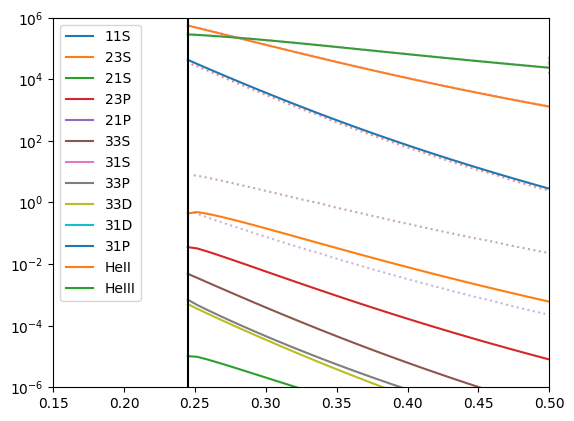

In [520]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = ["11S", "23P", "23S", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

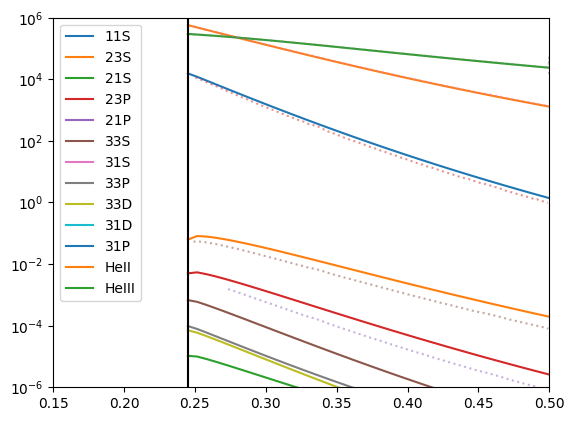

In [521]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    #environment.spectrum = BlackBody(environment.spectrum.temperature, scale=0.*environment.spectrum.scale)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    #nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = ["11Swithout", "23Pwithout", "23Swithout", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

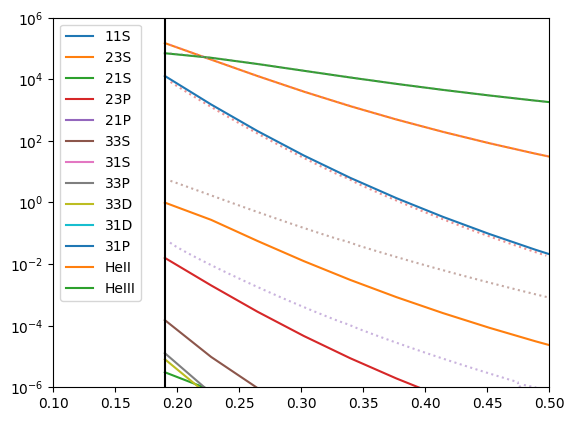

In [522]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.19, 0.9, 20)
densities = []
for v in velocities:
    #states = NLTE.NLTE_model.States().filter(["11S", "23S", "21S", "23P", "21P", "33S"])
    environment  = NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.19, line_velocity= v, t_d= 3.41)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)#, states=states)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)

tarumi_states = ["11S", "23P", "23S", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/late{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.1, 0.5)
plt.axvline(0.19, linestyle="-", color="black")

[<NLTE.NLTE_model.CollisionProcess object at 0x7fc10ec77940>, <NLTE.NLTE_model.RadiativeProcess object at 0x7fc1062b9690>, <NLTE.NLTE_model.RecombinationProcess object at 0x7fc104bd4bb0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7fc104bd5600>]


/tmp/ipykernel_146506/225235729.py:20: RuntimeWarning: divide by zero encountered in log10
  widths = np.clip(np.log10(total_fluxes)+7, 0, 10)


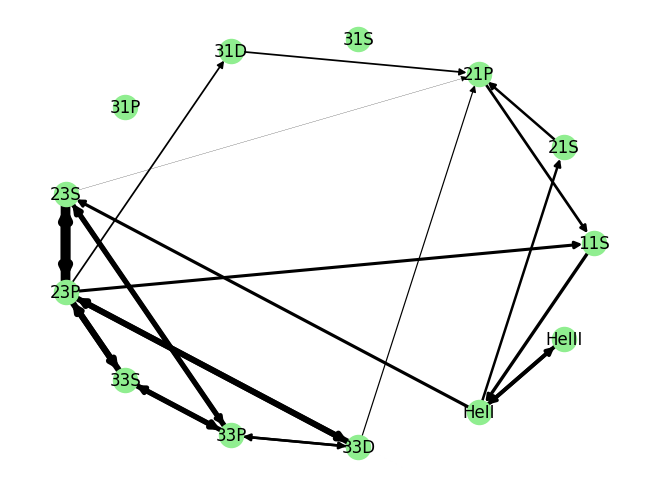

In [523]:
import networkx as nx

# A_{i,j} = rate to state i from state j 
environment  = NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.19, line_velocity= 0.19, t_d= 3.41)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment)#, states=states)
nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
#nlte_solver = NLTE.NLTE_model.NLTESolver(environments[1])
#nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]

t, y = nlte_solver.solve(1000000)
print(nlte_solver.processes)
total_fluxes = (nlte_solver.processes[1].get_transition_rate_matrix() * y.T[-1][None,:]).T#[Non,:]

total_fluxes = (nlte_solver.get_transition_rate_matrix() * y.T[-1][None,:]).T#[Non,:]
total_fluxes = total_fluxes / np.max(total_fluxes)
# give nodes the names states.names + ["HeII", "HeIII"]
order= [0,2,4,6,9, 10,1, 3, 5, 7, 8, 11, 12]
#order = np.arange(len(states.names) + 2)

widths = np.clip(np.log10(total_fluxes)+7, 0, 10)
G = nx.DiGraph(widths[order, :][:, order])
labels = {i:name for i, name in enumerate(np.array(states.names + ["HeII", "HeIII"])[order])}
weights = nx.get_edge_attributes(G,'weight').values()

pos = nx.circular_layout(G)
nx.draw(G, pos,
        width=list(weights),
        with_labels=True,
        labels=labels,
        node_color='lightgreen')
#plt.plot(states.names + ["HeII", "HeIII"], -np.diag(rate_matrix))
#plt.yscale("log")
#plt.xlabel("State")
#nx.draw_circular(G, with_labels=True, labels=labels, width=list(widths))

for process Collision the max flux into ortho states is 9.096626368748177e-12, which is from state 21S to state 23S
for process Radiative the max flux into ortho states is 0.0002920089971448108, which is from state 31D to state 23P
for process Photoionization the max flux into ortho states is 0.0, which is from state 11S to state 23S
for process Recombination the max flux into ortho states is 3.3013927674409826, which is from state HeII to state 23S
for process Hot electron ionization the max flux into ortho states is 0.0, which is from state 11S to state 23S


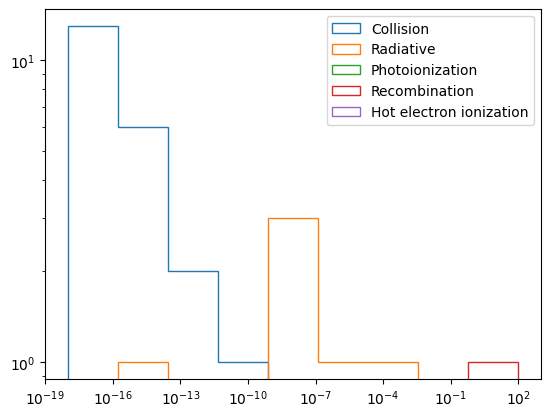

for process Collision the max flux out of ortho states is 1.6649014282358789e-07, which is from state 23S to state 21S
for process Radiative the max flux out of ortho states is 1.5081378587408776, which is from state 23P to state 31D
for process Photoionization the max flux out of ortho states is 0.4038070210741509, which is from state 33S to state HeII
for process Recombination the max flux out of ortho states is 0.0, which is from state 23S to state 11S
for process Hot electron ionization the max flux out of ortho states is 0.0, which is from state 23S to state 11S


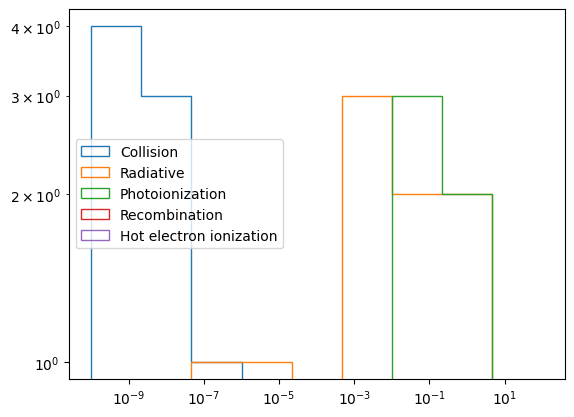

In [492]:
# make histogram of the flux sizes for each process
nlte_solver = NLTE.NLTE_model.NLTESolver(environments[1])
t, y = nlte_solver.solve(1000000)

ortho_states = np.array([name[1] == "3" for name in nlte_solver.states.all_names])
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    in_fluxes = fluxes[ortho_states, :][:, ~ortho_states]
    idx = np.unravel_index(np.argmax(in_fluxes), in_fluxes.shape)
    plt.hist(in_fluxes.flatten(), bins=np.geomspace(1e-18, 100, 10), label=process.name, alpha=1, histtype="step")
    print(f"for process {process.name} the max flux into ortho states is {np.max(in_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[ortho_states][idx[0]]}")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    out_fluxes = fluxes[~ortho_states, :][:, ortho_states]
    idx = np.unravel_index(np.argmax(out_fluxes), out_fluxes.shape)
    plt.hist(out_fluxes.flatten(), bins=np.geomspace(1e-10, 100, 10), label=process.name, alpha=1, histtype="step")
    print(f"for process {process.name} the max flux out of ortho states is {np.max(out_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[0]]}")
plt.legend()
plt.xscale("log")
plt.yscale("log")

In [513]:
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("11S"), nlte_solver.states.all_names.index("23P")]
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("23P"), nlte_solver.states.all_names.index("33D")]
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("21P"), nlte_solver.states.all_names.index("33P")]

39282000.0

nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("21S"), nlte_solver.states.all_names.index("23P")]

In [514]:
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("11S"), nlte_solver.states.all_names.index("23P")]


176.4